In [6]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score 
from sklearn.naive_bayes import MultinomialNB

In [7]:
#%pip install ucimlrepo

In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
yeast = fetch_ucirepo(id=110) 
  
# data (as pandas dataframes) 
X = yeast.data.features 
y = yeast.data.targets 
  
# metadata 
print(yeast.metadata) 
  
# variable information 
print(yeast.variables) 

{'uci_id': 110, 'name': 'Yeast', 'repository_url': 'https://archive.ics.uci.edu/dataset/110/yeast', 'data_url': 'https://archive.ics.uci.edu/static/public/110/data.csv', 'abstract': 'Predicting the Cellular Localization Sites of Proteins', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1484, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['localization_site'], 'index_col': ['Sequence_Name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Sat Oct 28 2023', 'dataset_doi': '10.24432/C5KG68', 'creators': ['Kenta Nakai'], 'intro_paper': None, 'additional_info': {'summary': 'Predicted Attribute: Localization site of protein. ( non-numeric ).\r\n\r\nThe references below describe a predecessor to this dataset and its development. They also give results (not cross-validated) for classification by a rule-based expert system with that version of th

In [10]:
yeast_data = pd.concat([X,y], axis=1)

In [11]:
yeast_data.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,localization_site
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [ ]:
#Part 2: describing the dataset
#The first task is to report on the structure of the dataset and the goal of data mining for the dataset.
#Use a table to give an overview of the attributes, to note the attribute types and to give a brief description of the attributes.

In [4]:
display(yeast.data.features)

,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39


In [5]:
print("Rows, columns:", X.shape)
print("Rows, columns:",y.shape)

Rows, columns: (1484, 8)
Rows, columns: (1484, 1)


In [6]:
X.dtypes

mcg    float64
gvh    float64
alm    float64
mit    float64
erl    float64
pox    float64
vac    float64
nuc    float64
dtype: object

In [7]:
y.dtypes

localization_site    object
dtype: object

In [ ]:
#Part 3: exploring and pre-processing
#Explore the dataset. Use visualization techniques to gain information on which attributes may be correlated to predict the target(s). 
#Describe the executed pre-processing steps and substantiate why you performed the steps.

<Axes: xlabel='localization_site', ylabel='count'>

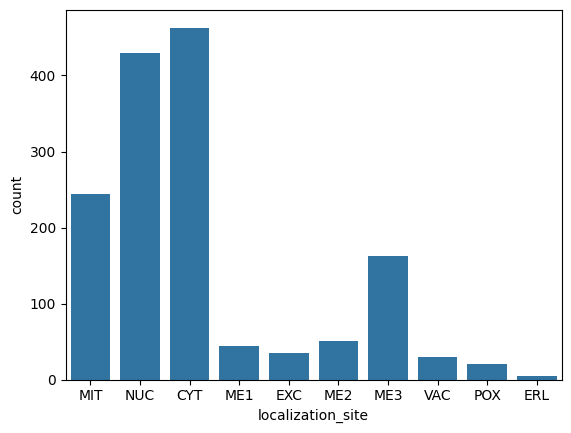

In [8]:
sns.countplot(y, x = "localization_site")

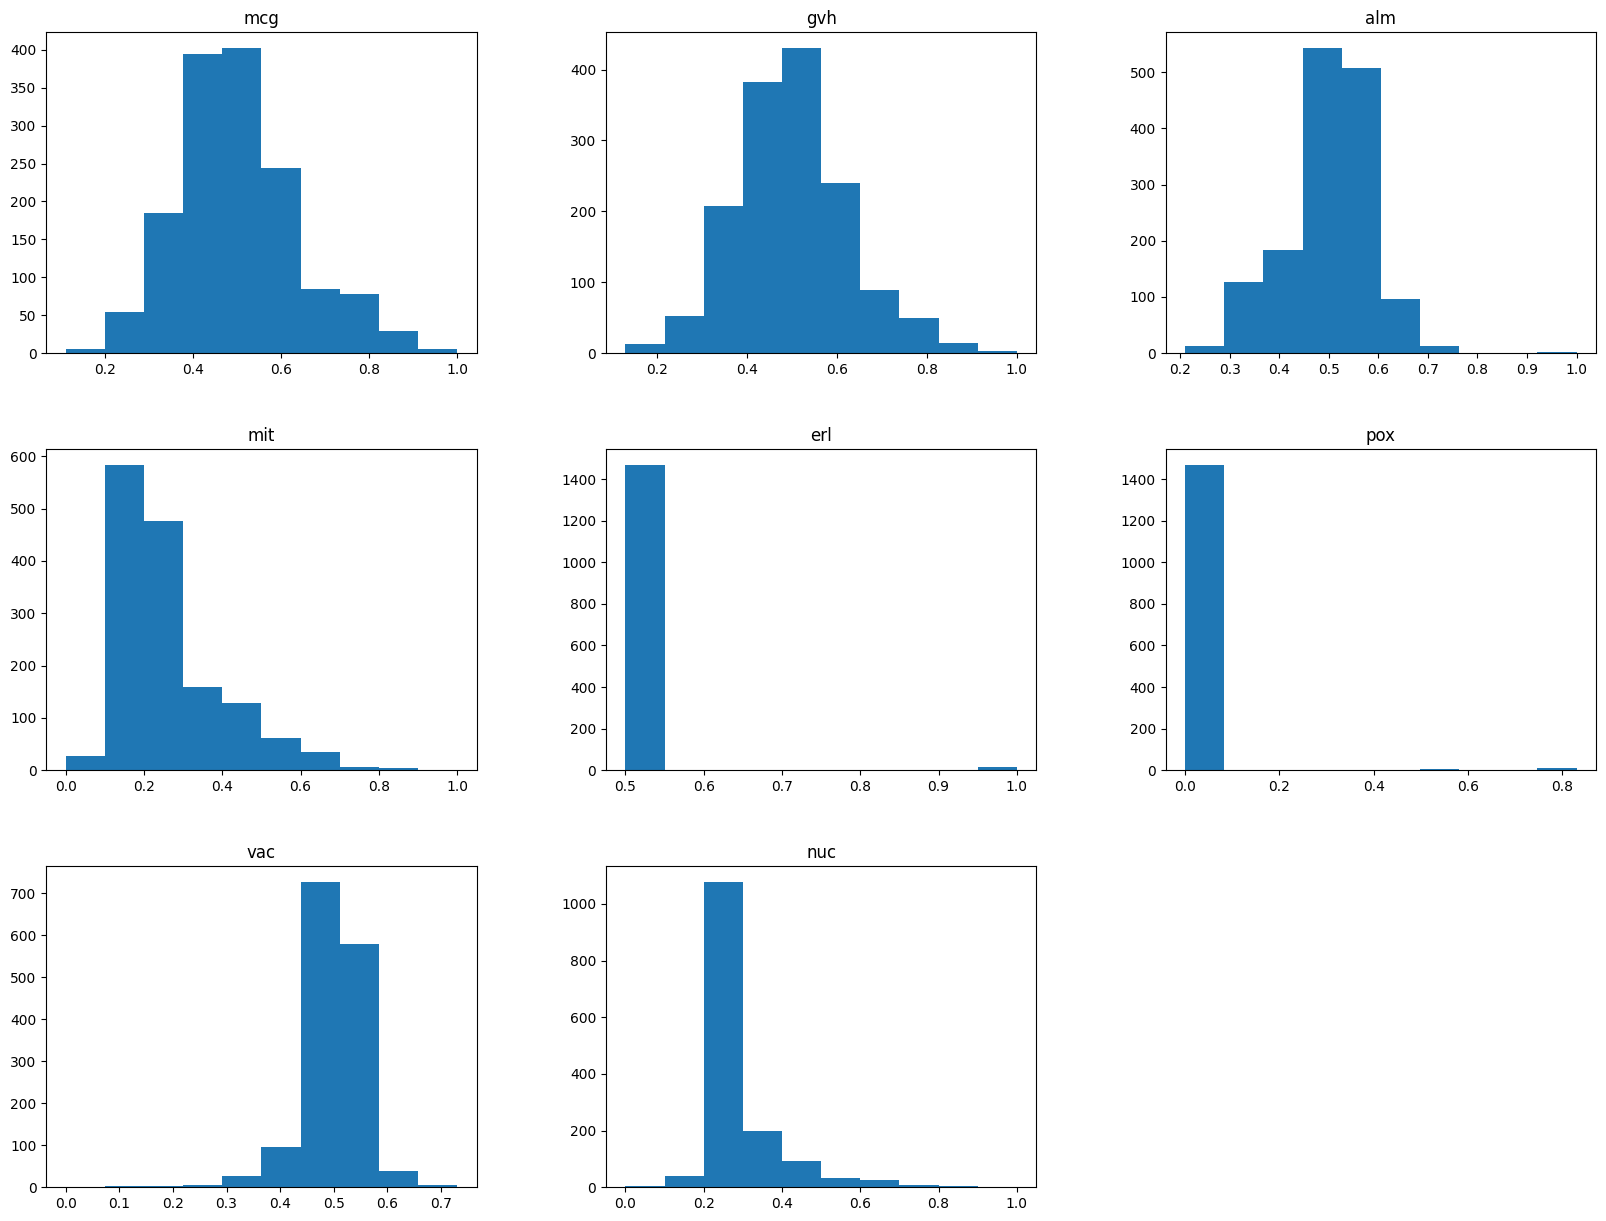

In [9]:
plot = X.hist(figsize=(20,15),grid=False)

In [ ]:
from scipy.stats import zscore

# Remove the outliers (example code)
data_no_outliers = data[(abs(zscore(data))<=5).all(axis=1)]

# Take a look at the new shape of the dataframe
data_no_outliers.shape

In [ ]:
# Look at the correlations between multiple features by displaying a correlation plot (in heatmap form)
f, ax = plt.subplots(figsize=(20, 16))
corr = data_no_outliers.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [ ]:
#Part 4: regression
#Use one or more regression techniques to predict a target value. 
#If you choose a technique that is not discussed the course unit, provide a brief description of the technique in your report. 
#After the models construction, use a test set to test your model. 
#Show interesting metrics for the model and try to optimize it. For this you can use normalization, regularization, hyperparameter tuning, higher order features. 
#Describe as much as possible what you have tried and what works and what doesn't work for your dataset.

In [ ]:
#Part 5: classification
#Use one or more classification techniques to predict a target class. 
#If you choose a technique that is not discussed the course unit, provide a brief description of the technique in your report. 
#If there is no class attribute provided or there are multiple class attributes available, create and/or choose one class attribute. 
#After the models construction, use a test set to test your model. 
#Show interesting metrics for the model and try to optimize it. 
#For this you can use normalization, regularization, hyperparameter tuning, higher order features. 
#Describe as much as possible what you have tried and what works and what doesn't work for your dataset.

In [ ]:
#Part 6: clustering
#Choose and apply one or more clustering techniques to your dataset. 
#If you choose a technique that is not in the syllabus of the course unit, provide a brief description of the technique in your report. 
#You are not obliged to use all the available attributes in your model. 
#You can restrict your analysis to attributes that have a good performance, for example by trying different combinations of attributes. 
#Try to use the cluster model as a classification model based on the same attribute as in part 5

In [ ]:
#Part 7: conclusion
#Write a conclusion for the different techniques.
#    Was this a good dataset to try and perform machine learning on?
 #   What where the biggest problems?
  #  If you tried multiple different models for some of the parts, which one worked best?
   # Would you say the different models are good enough to use in a practical context? Why, why not?